
<img style="float: left;;" src='Figures/alinco.png' /></a>
    
# <center> <font color= #000047> Módulo III: Aprendizaje No supervizado: Kmeans


## Introducción


K-Means es un algoritmo no supervisado de Clustering. Se utiliza cuando tenemos un montón de datos sin etiquetar. El objetivo de este algoritmo es el de encontrar “K” grupos (clusters) entre los datos crudos. 

**¿Cómo funciona?**

El algoritmo trabaja iterativamente para asignar a cada “muestra” uno de los “K” grupos basado en sus características. Son agrupados en base a la similitud de sus features (las columnas). Como resultado de ejecutar el algoritmo tendremos:


> Los `“centroids”` de cada grupo que serán unas “coordenadas” de cada uno de los K conjuntos qu>e se utilizarán para poder etiquetar nuevas muestras.

> `Etiquetas` para el conjunto de datos de entrenamiento. Cada etiqueta perteneciente a uno de los K grupos formados.

Los grupos se van definiendo de manera “orgánica”, es decir que se va ajustando su posición en cada iteración del proceso, hasta que converge el algoritmo. Una vez hallados los centroids deberemos analizarlos para ver cuales son sus características únicas, frente a la de los otros grupos. Estos grupos son las etiquetas que genera el algoritmo.

## Casos de Uso de K-Means

Algunos casos de uso son:

> **Segmentación por Comportamiento:** relacionar el carrito de compras de un usuario, sus tiempos de acción e información del perfil.

> **Categorización de Inventario:** agrupar productos por actividad en sus ventas
Detectar anomalías o actividades sospechosas: según el comportamiento en una web reconocer un troll -o un bot- de un usuario normal


## Algoritmo K-means

El algoritmo utiliza una proceso **iterativo** en el que se van ajustando los grupos para producir el resultado final. Para ejecutar el algoritmo deberemos pasar como entrada el `conjunto de datos` y un valor de `K`. El conjunto de datos serán las características o features para cada punto. Las posiciones iniciales de los K centroids serán asignadas de manera aleatoria de cualquier punto del conjunto de datos de entrada. Luego se itera en dos pasos:

> 1.- **Paso de asignación** $argmin_{c_i \in C} dist(c_i, x)^2$

> 2.- **Paso de actualización del Centroide**  En este paso los centroides de cada grupo son recalculados. Esto se hace tomando una media de todos los puntos asignados en el paso anterior. $c_i = \frac{1}{|s_i|}\sum_{x_i \in s_i} x_i$

El algoritmo itera entre estos pasos hasta cumplir un criterio de detención:
*  si no hay cambios en los puntos asignados a los grupos,
* o si la suma de las distancias se minimiza,
* o se alcanza un número máximo de iteraciones.

El algoritmo converge a un resultado que puede ser el óptimo local, por lo que será conveniente volver a ejecutar más de una vez con puntos iniciales aleatorios para confirmar si hay una salida mejor.



## Criterios de Elección de Grupos

> Criterio del codo

> Criterio del gradiente

## Ejemplo 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
#%% Generar datos aleatorios
X, Y = make_blobs(n_samples=1500, random_state=5)


In [4]:
X

array([[-4.4207936 ,  7.90908652],
       [-5.6742539 ,  8.24798888],
       [ 0.15096735,  3.72731887],
       ...,
       [-6.15312156,  7.33253057],
       [-6.20649316,  7.96321396],
       [ 0.8546093 ,  1.95771111]])

In [5]:
Y

array([0, 1, 2, ..., 0, 0, 2])

Text(0, 0.5, '$x2$')

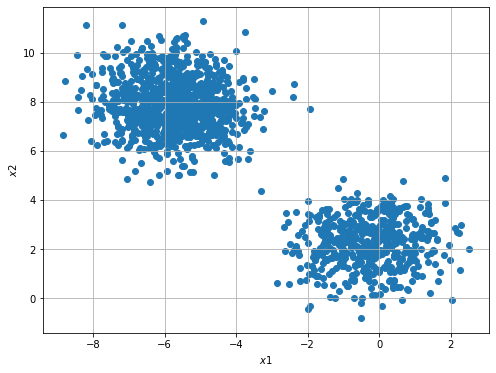

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1])
plt.grid()
plt.xlabel('$x1$')
plt.ylabel('$x2$')

In [17]:
#%% Aplicar el algoritmo Kmeans
model = KMeans(n_clusters = 6, random_state=5, init='random')


In [18]:
type(model)

sklearn.cluster._kmeans.KMeans

In [19]:
model = model.fit(X)

In [20]:
grupos = model.predict(X)
grupos

array([3, 0, 5, ..., 1, 1, 5])

In [21]:
centroides = model.cluster_centers_
centroides

array([[-5.63353288,  9.0686265 ],
       [-6.815447  ,  7.64901121],
       [-1.18924422,  2.78006083],
       [-4.98816626,  7.16133306],
       [-0.49996597,  1.10139565],
       [ 0.61429837,  2.63881889]])

Text(0, 0.5, '$x2$')

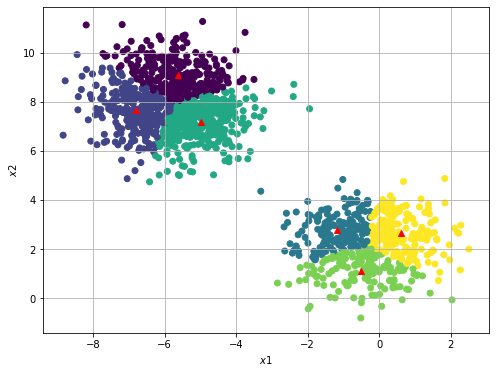

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=grupos)
plt.plot(centroides[:,0],centroides[:,1], '^r')
plt.grid()
plt.xlabel('$x1$')
plt.ylabel('$x2$')

In [23]:
model.inertia_

1444.0493399814766

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


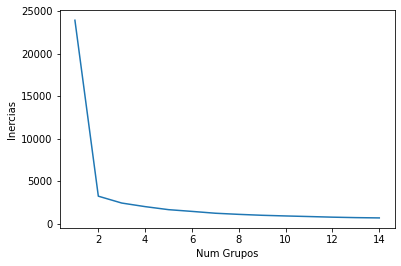

In [24]:
#%% Criterio de selección del codo
inercias = np.zeros(15)
for k in np.arange(1,15):
    model = KMeans(n_clusters = k, random_state=5, init='random')
    model = model.fit(X)
    inercias[k] = model.inertia_


plt.figure(figsize=(6,4))
plt.plot(np.arange(1,15), inercias[1:])
plt.xlabel('Num Grupos')
plt.ylabel('Inercias')
plt.show()

In [25]:
#%% Función del Criterio de selección del codo kmeans
def CriterioCodoKmeans(X, n_g=15):
    inercias = np.zeros(n_g)
    for k in np.arange(1,n_g):
        model = KMeans(n_clusters = k, random_state=5, init='random')
        model = model.fit(X)
        inercias[k] = model.inertia_


    plt.figure(figsize=(6,4))
    plt.plot(np.arange(1,n_g), inercias[1:])
    plt.xlabel('Num Grupos')
    plt.ylabel('Inercias')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


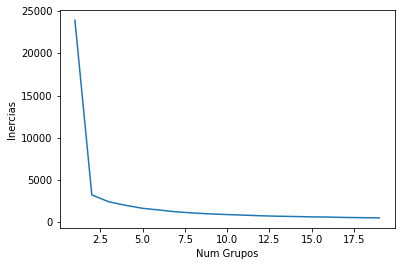

In [26]:
CriterioCodoKmeans(X,20)

In [ ]:
# Criterio del gradiente, (Tarea: método para su librería de cdin que me calcule el crterio del gradiente)




Text(0, 0.5, '$x2$')

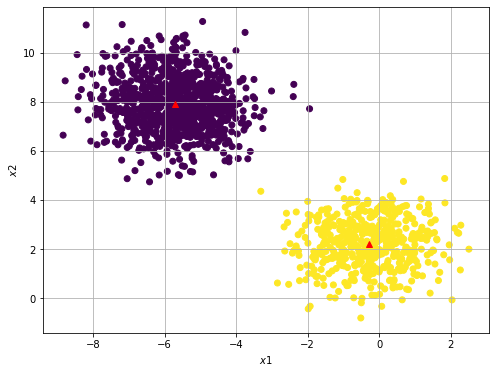

In [27]:
#%% Definiendo el número de grupos optimos
#%% Aplicar el algoritmo Kmeans con 2 grupos
model = KMeans(n_clusters = 2, random_state=5, init='random')
model = model.fit(X)
grupos = model.predict(X)
centroides = model.cluster_centers_

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=grupos)
plt.plot(centroides[:,0],centroides[:,1], '^r')
plt.grid()
plt.xlabel('$x1$')
plt.ylabel('$x2$')


## Ejemplo 2

In [ ]:
#%% Leer los datos

#%% drop de columnas time y class

#%% Estandarizar los datos


In [ ]:
#%% Aplicar el algoritmo de clustering
# Aplicar el criterio de selección del codo


In [ ]:
# plot de las inercias


In [ ]:
#%% Ejecutar el algoritmo con k = 11


In [ ]:
#%% Obtener los centroides


In [ ]:
# Eligiendo 3 variables para plotear 

# Creating figure


## Ejemplo 3

Tiene un centro comercial de supermercado y, a través de las tarjetas de membresía, tiene algunos datos básicos sobre sus clientes, como ID de cliente, edad, sexo, ingresos anuales y puntaje de gastos.

Usted es el propietario del centro comercial y desea comprender a sus clientes. Desea saber quienes clientes pueden ser clientes objetivos para que el equipo de marketing planifique una campaña.

**¿Quiénes son sus clientes objetivo con los que puede iniciar la estrategia de marketing?**

Para responder la pregunta anterior necesitamos realizar lo siguiente:

>1.- data quality report dqr 

>2.- Limpieza de datos

>3.- Analisis exploratorio de datos EDA

>4.- Aplicar el criterio de selección de grupos -> el número opt de grupos

>5.- Aplican kmeans con el num opt de grupos

>6.- Conclusiones o comentarios acerca de los resultados

In [29]:
#%% Leer los datos
data = pd.read_csv('Data/shopping-data.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [30]:
#%% 1.- data quality report dqr
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [31]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [34]:
#%% 2.- Limpieza de datos
data['GenreCode']=data['Genre'].map({'Male':0, 'Female':1})
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),GenreCode
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


In [40]:
#%% 3.- EDA
## 1er insight
sexo_customers = data['Genre'].value_counts()

In [41]:
sexo_customers

Female    112
Male       88
Name: Genre, dtype: int64

In [44]:
import seaborn as sns

<AxesSubplot:>

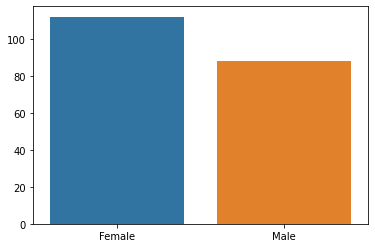

In [46]:
sns.barplot(x=sexo_customers.index, y= sexo_customers.values)

In [47]:
## 2do insight (rango de edades)
edad_18_25 = data['Age'][(data['Age']>=18) &(data['Age']<25)]
edad_25_35 = data['Age'][(data['Age']>=25) &(data['Age']<35)]
edad_35_45 = data['Age'][(data['Age']>=35) &(data['Age']<45)]
edad_45_mas = data['Age'][(data['Age']>=45)]

In [48]:
x = ['18-24','25,34','35-44','45+']
y = [len(edad_18_25), len(edad_25_35), len(edad_35_45), len(edad_45_mas)]

Text(0, 0.5, 'Numero de clientes')

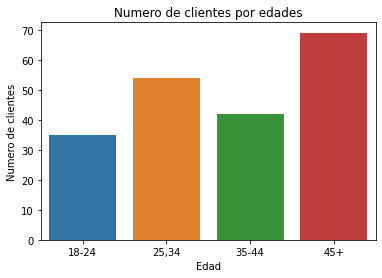

In [49]:
plt.figure(figsize=(6,4))
sns.barplot(x=x,y=y)
plt.title('Numero de clientes por edades')
plt.xlabel('Edad')
plt.ylabel('Numero de clientes')

In [50]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),GenreCode
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


In [51]:
#%% 4.- Aplicar el criterio de selección de grupos
X_data = data.iloc[:,2:]
X_data

,Age,Annual Income (k$),Spending Score (1-100),GenreCode
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1
...,...,...,...,...
195,35,120,79,1
196,45,126,28,1
197,32,126,74,0
198,32,137,18,0


In [52]:
X_data.values

array([[ 19,  15,  39,   0],
       [ 21,  15,  81,   0],
       [ 20,  16,   6,   1],
       [ 23,  16,  77,   1],
       [ 31,  17,  40,   1],
       [ 22,  17,  76,   1],
       [ 35,  18,   6,   1],
       [ 23,  18,  94,   1],
       [ 64,  19,   3,   0],
       [ 30,  19,  72,   1],
       [ 67,  19,  14,   0],
       [ 35,  19,  99,   1],
       [ 58,  20,  15,   1],
       [ 24,  20,  77,   1],
       [ 37,  20,  13,   0],
       [ 22,  20,  79,   0],
       [ 35,  21,  35,   1],
       [ 20,  21,  66,   0],
       [ 52,  23,  29,   0],
       [ 35,  23,  98,   1],
       [ 35,  24,  35,   0],
       [ 25,  24,  73,   0],
       [ 46,  25,   5,   1],
       [ 31,  25,  73,   0],
       [ 54,  28,  14,   1],
       [ 29,  28,  82,   0],
       [ 45,  28,  32,   1],
       [ 35,  28,  61,   0],
       [ 40,  29,  31,   1],
       [ 23,  29,  87,   1],
       [ 60,  30,   4,   0],
       [ 21,  30,  73,   1],
       [ 53,  33,   4,   0],
       [ 18,  33,  92,   0],
       [ 49,  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


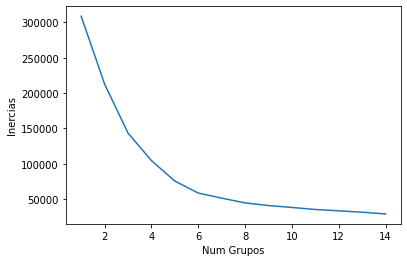

In [53]:
CriterioCodoKmeans(X_data.values)

In [ ]:
# Visualizando el criterio del codo, se observa que con 5 grupos
# se puede obtener una buena clasificación

In [56]:
#%% 5.- Aplica kmeans con el num opt de grupos
model_opt = KMeans(n_clusters = 5, random_state=5, init='random')
model_opt = model_opt.fit(X_data.values)


In [58]:
centroides_opt = model_opt.cluster_centers_
grupos_opt = model_opt.predict(X_data.values)

In [59]:
grupos_opt

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2,
       1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [61]:
#%% 6.- Conclusiones o comentarios acerca de los resultados
# Visualizar todos los clusters
# Creating figure
from mpl_toolkits.mplot3d import axes3d, Axes3D

C:\Users\uie70742\AppData\Local\Temp/ipykernel_43880/1079823318.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


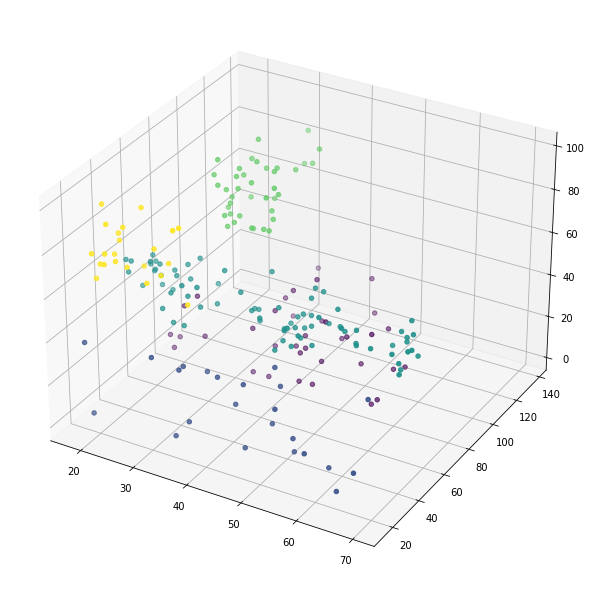

In [62]:
fig = plt.figure(figsize=(10,8))
ax=Axes3D(fig)

ax.scatter3D(X_data.values[:,0],X_data.values[:,1],X_data.values[:,2], c=grupos_opt)

In [ ]:
centroides_opt